# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [38]:
import pandas as pd
import numpy as np

In [39]:
#np.random.randn(100)

In [40]:
x = 1.5 + 2.5 * np.random.randn(100)# Calculo de valores de X conforme a una normal N(1.5,2.5) Los valores de distribuyen entorno a la media más la desviación tipica.

In [41]:
res = 0 + 0.8 * np.random.randn(100) # Calculo de valores de error o resto conforme a una normal N(0,0.8) Los valores de distribuyen entorno a la media más la desviación tipica.

In [42]:
y_pred = 5 + 0.3 * x # Esta es la formula de regresión lineal para la Y predecida

In [43]:
y_act = 5 + 0.3 * x + res # Esta es la formula de regresión lineal para la Y real o que se esta miediendo que siempre tiene un error o resto

In [44]:
#Generamos listas para poder construir el data set
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [45]:
#Una vez tenemos listas el dataset lo construimos con un diccionario en el que el primer campo es el nombre de la columna
# y el segundo la lista con los valores
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [46]:
data.head()

,x,y_actual,y_prediccion
0,0.114469,4.255122,5.034341
1,-1.661963,5.778389,4.501411
2,-0.621454,5.130455,4.813564
3,-1.332750,3.066643,4.600175
4,-0.383569,5.009052,4.884929


In [47]:
import matplotlib.pyplot as plt

In [48]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]#Generamos el promedio de las y_act

Text(0.5, 1.0, 'Valor Actual vs Predicción')

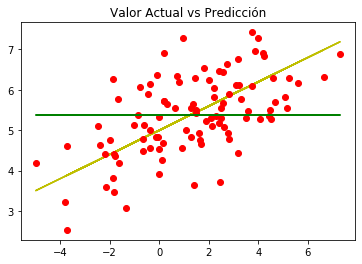

In [50]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"], "y")
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [16]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [17]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,2.929426,5.944999,5.878828,0.219917,0.004379,0.286357
1,4.051866,5.889875,6.215560,0.649128,0.106070,0.230400
2,1.228358,4.728026,5.368507,0.001711,0.410216,0.464918
3,2.609673,4.318531,5.782902,0.139149,2.144381,1.191031
4,0.120765,6.644548,5.036229,0.139611,2.586689,1.524418


In [18]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [19]:
SSR

58.05345994430836

In [20]:
SSD

62.51895631657374

In [21]:
SST

108.06255885021636

In [22]:
SSR+SSD

120.57241626088211

In [23]:
R2 = SSR/SST

In [24]:
R2

0.5372208520878656

(array([ 2.,  2.,  4., 12., 12., 22., 19., 16.,  7.,  4.]),
 array([-2.52362778, -2.10919908, -1.69477037, -1.28034166, -0.86591295,
        -0.45148424, -0.03705553,  0.37737318,  0.79180189,  1.2062306 ,
         1.62065931]),
 <a list of 10 Patch objects>)

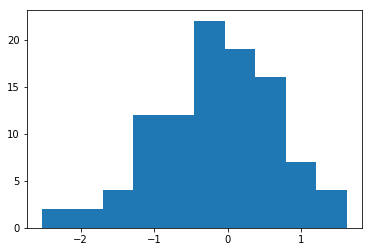

In [66]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [25]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.4758007682090808, 5.409874889339738)

In [26]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [27]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [28]:
alpha = y_mean - beta * x_mean

In [29]:
alpha, beta

(5.0141010211007435, 0.26817567571758033)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [30]:
data["y_model"] = alpha + beta * data["x"]

In [31]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,2.929426,5.944999,5.878828,0.219917,0.004379,0.286357,0.777869,2.113025,5.799702
1,4.051866,5.889875,6.215560,0.649128,0.106070,0.230400,1.236512,6.636111,6.100713
2,1.228358,4.728026,5.368507,0.001711,0.410216,0.464918,0.168719,0.061228,5.343517
3,2.609673,4.318531,5.782902,0.139149,2.144381,1.191031,-1.237444,1.285665,5.713952
4,0.120765,6.644548,5.036229,0.139611,2.586689,1.524418,-1.673027,1.836122,5.046487


In [32]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [33]:
SSR, SSD, SST

(46.30368705396816, 61.758871796248194, 108.06255885021633)

In [34]:
R2 = SSR / SST
R2

0.42848964106197884

Text(0.5, 1.0, 'Valor Actual vs Predicción')

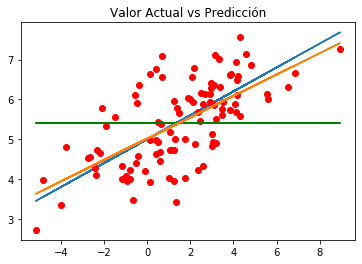

In [35]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [78]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.7991467852623195

In [80]:
np.mean(data["y_actual"])

5.555709335564895

In [81]:
RSE / np.mean(data["y_actual"]) #Porcentaje

0.14384243973070698

In [51]:
(100*25)/50

50.0

In [52]:
25/50

0.5

In [53]:
5/50

0.1